In [12]:
from copy import deepcopy
import matplotlib.pyplot as plt
from Bio import Phylo
#import dendropy

%matplotlib inline

In [28]:
ebola_tree = Phylo.read('my_all.nex', 'nexus')
ebola_tree.name = 'Ebolavirus tree'
ebola_simple_tree = Phylo.read('ebola_simple.nex', 'nexus')
ebola_simple_tree.name = 'Ebolavirus simplified tree'

#ebov_2014_tree = Phylo.read('ebov_2014_clean.nex', 'nexus')
#ebov_2014_tree.name = 'EBOV outbreak of 2014'
ebov_tree = Phylo.read('my_ebov.nex', 'nexus')
ebov_tree.name = 'EBOV only tree'

IOError: [Errno 2] No such file or directory: 'my_ebov.nex'

In [14]:
Phylo.draw_ascii(ebola_simple_tree)
Phylo.draw_ascii(ebola_tree)

 , BDBV
 |
 | BDBV
_|
 , BDBV
 |
 , BDBV
 |
 , BDBV
 |
 |              _______________ TAFV
 |             |
 |             |                       _____________________________ SUDV
 |_____________|            __________|
               |           |          |__________________________ RESTV
               |           |
               |___________|                 , EBOV1995
                           |                ,|
                           |                || EBOV1976
                           |                |
                           |________________| EBOV2007
                                            |
                                            | EBOV2014

 , 'BDBV_KC545395 18728 bp'
 |
 , 'BDBV_KC545394 18728 bp'
 |
 , 'BDBV_KC545396 18728 bp'
 |
 |                                          , 'SUDV_FJ968794 18728 bp'
 |                                          |
 |                                          | 'SUDV_KC242783 18728 bp'
 |                               

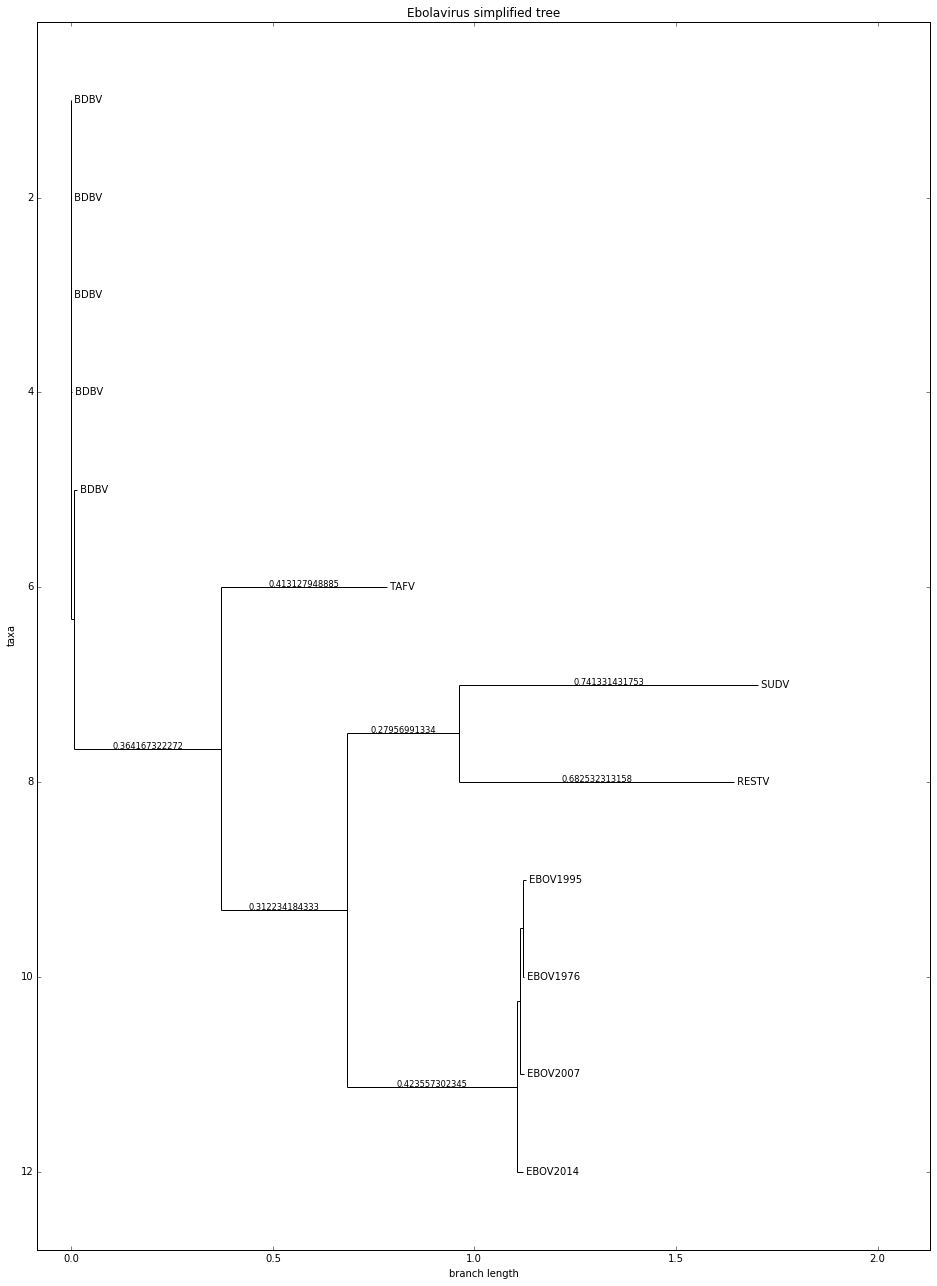

In [15]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
Phylo.draw(ebola_simple_tree, branch_labels=lambda c: c.branch_length if c.branch_length > 0.02 else None, axes=ax)

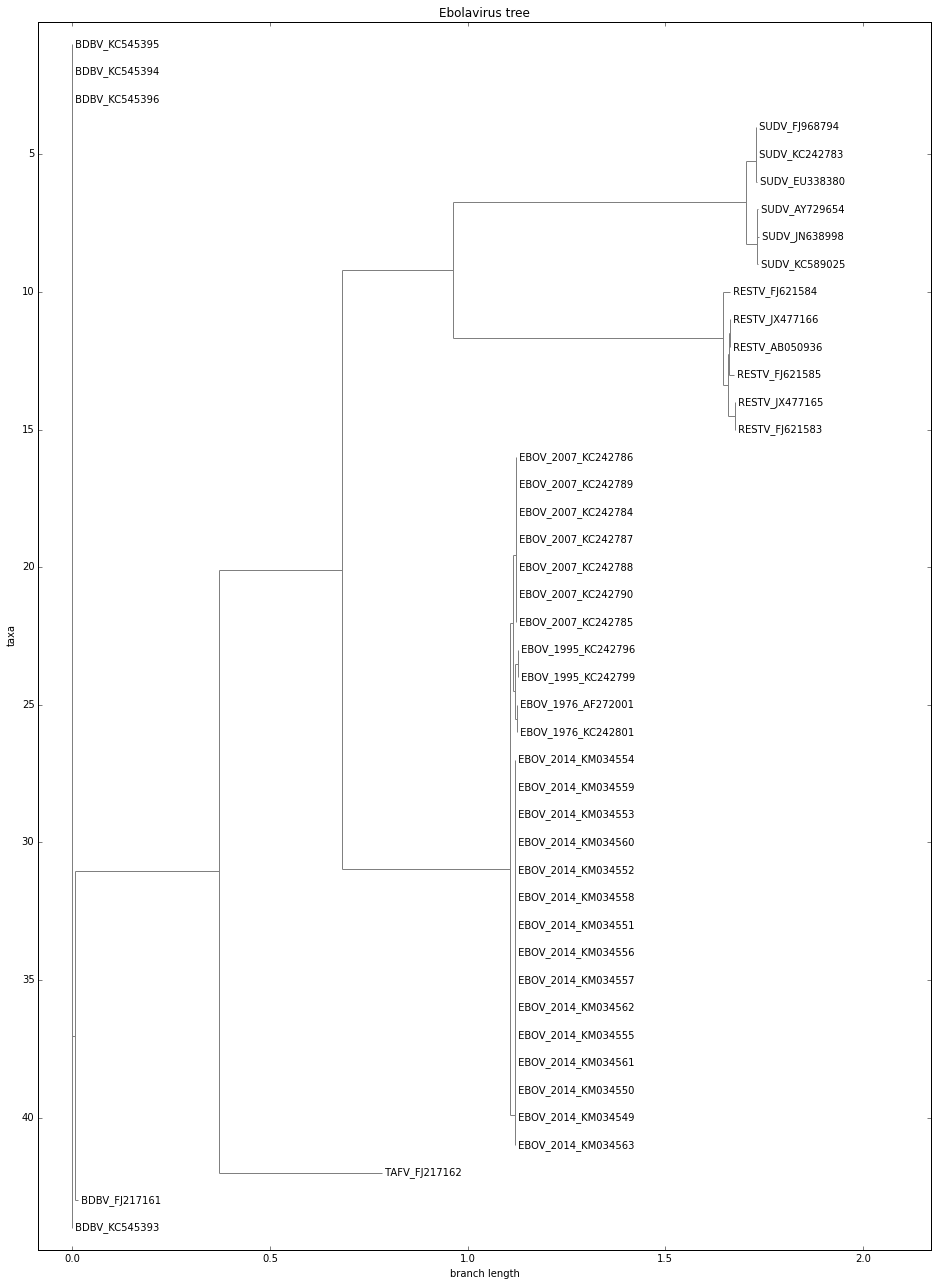

In [26]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
#Phylo.draw(ebola_tree, axes=ax)
from collections import OrderedDict
my_colors = OrderedDict({
'EBOV_2014': 'red',
'EBOV': 'magenta',
'BDBV': 'cyan',
'SUDV': 'blue',
'RESTV' : 'green',
'TAFV' : 'yellow'
})

def get_color(name):
    for pref, color in my_colors.items():
        if name.startswith(pref):
            return color
    return 'grey'

def color_tree(node, fun_color=get_color):
    if node.is_terminal():
        node.color = fun_color(node.name)
    else:
        my_children = set()
        for child in node.clades:
            color_tree(child, fun_color)
            my_children.add(child.color.to_hex())
        if len(my_children) == 1:
            node.color = child.color
        else:
            node.color = 'grey'

ebola_color_tree = deepcopy(ebola_tree)
color_tree(ebola_color_tree.root)
Phylo.draw(ebola_color_tree, axes=ax, label_func=
           lambda x: x.name.split(' ')[0][1:] if x.name is not None else None)

NameError: name 'ebov_tree' is not defined

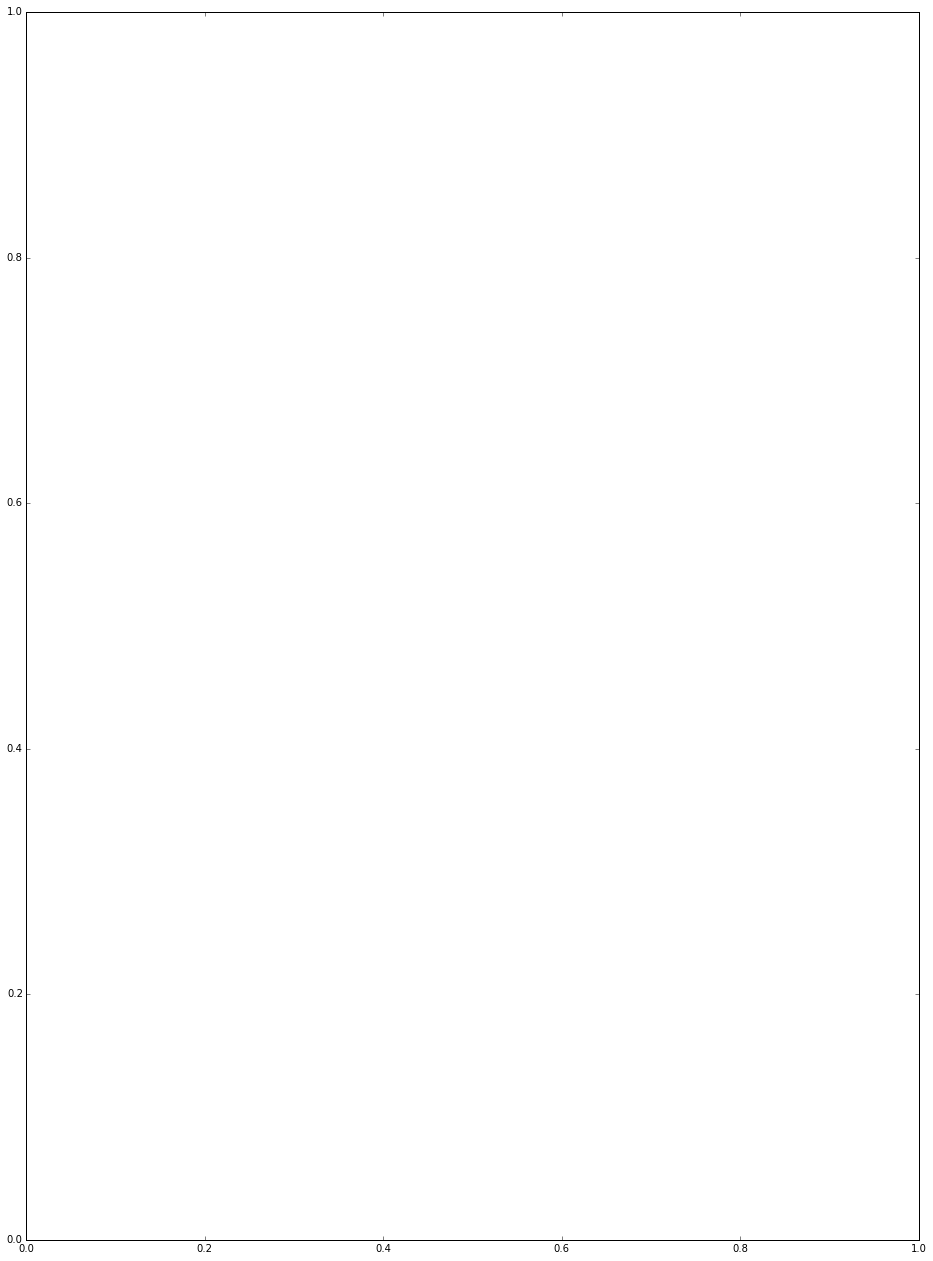

In [27]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
Phylo.draw(ebov_tree, axes=ax)

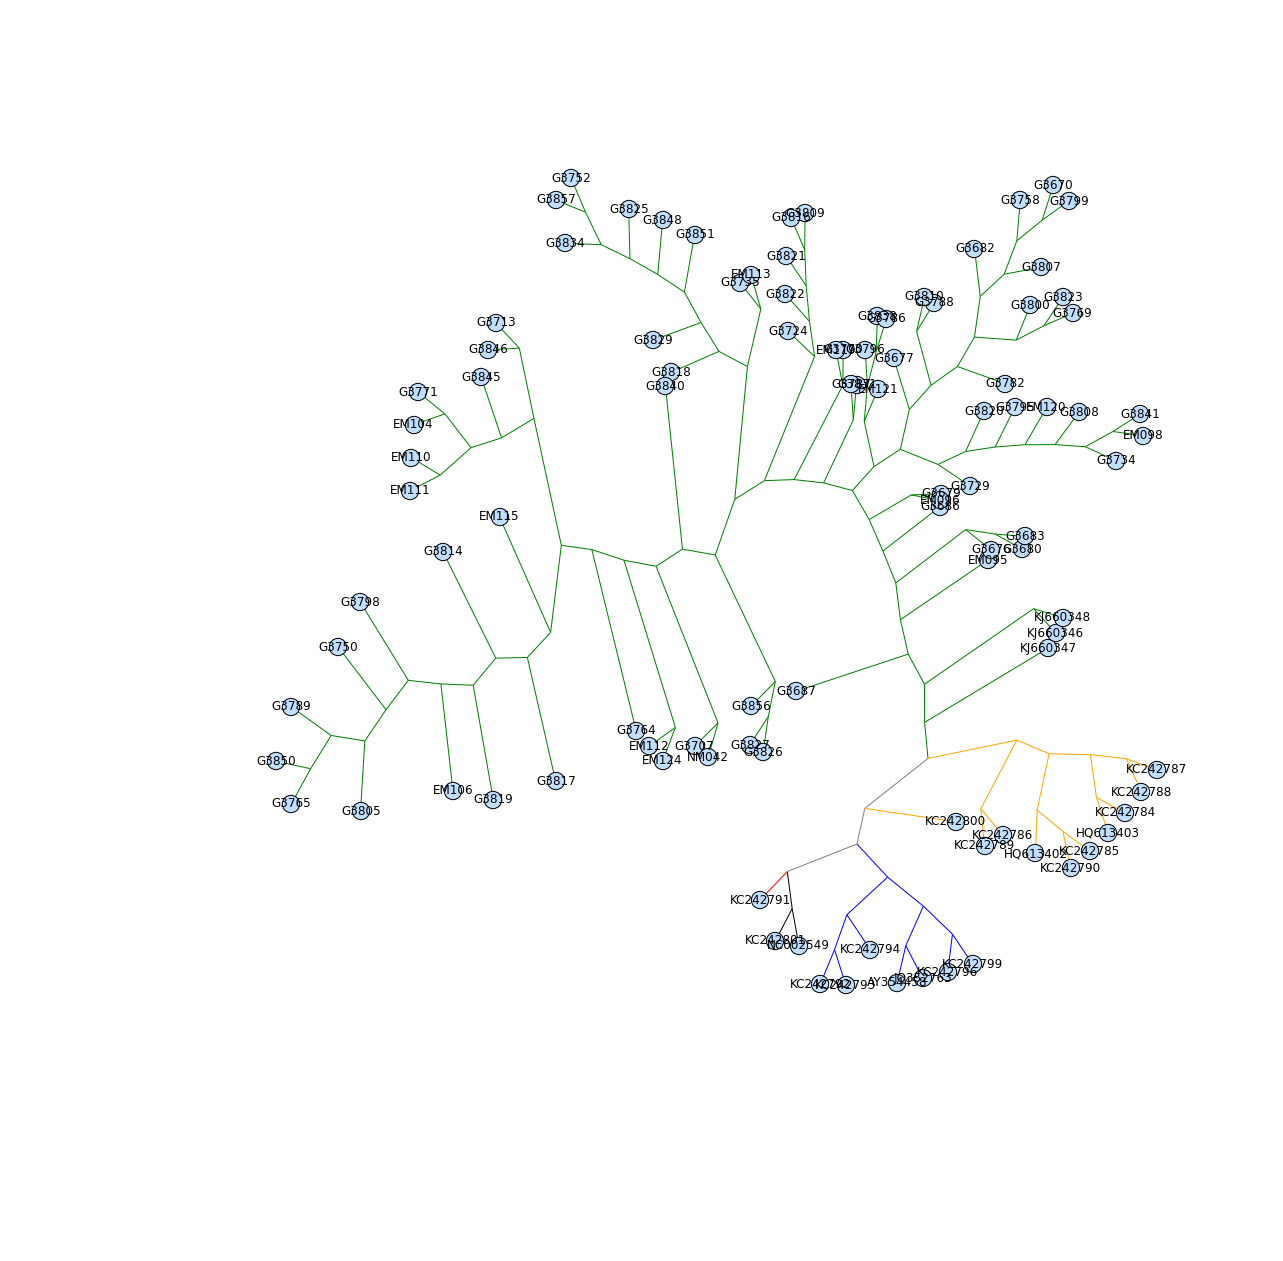

In [8]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111)
def simplify_name(n):
    if n.is_terminal:
        return n.name.split('_')[2]
    else:
        return None
    
def get_year_color(name):
    my_year = int(name.split('_')[1])
    year_color = {1976: 'black', 1976: 'black',
                  1996 : 'blue', 1995: 'blue', 1994: 'blue',
                  2002: 'orange', 2007: 'orange', 2008: 'orange',
                  2014 : 'green'}
    for year, color in year_color.items():
        if year == my_year:
            return color
    return 'red'

color_tree(ebov_tree.root, fun_color=get_year_color)
Phylo.draw_graphviz(ebov_tree, label_func=simplify_name, axes=ax, with_labels=True)